# Wprowadzenie do zastosowania sieci neuronowych w PJN

<br/>

## dr inż. Aleksander Smywiński-Pohl

## apohllo@agh.edu.pl

## http://apohllo.pl/dydaktyka/nlp

# Plan

* **rodzaje klasyfikacji**
* miary poprawności klasyfikacji
* klasyfikacja w oparciu o regułę Bayesa
* klasyfikacja w oparciu o osadzenia wyrazów
* regresja tekstowa

## Segmentacja obrazu

<center><img src="img/segmentation.jpeg"/></center>

## Klasyfikacja tekstu

<center><img src="img/sentiment-prediction.png"/></center>

## Klasyfikacja binarna

&nbsp;

<center><img src="img/black-white.jpg"/></center>

* dwie klasy, np. 0 i 1
* obiekt należy zawsze albo do 0 albo do 1
* przykład: spam

## Przykład klasyfikacji binarnej tekstu

### Cyberbullying Detection (Klej benchmark)

<span style="color: red">Sekta, cha, cha, cha, obudź się z hipnozy, jesteś bolszewikiem</span>

<span style="color: green">Jak powiem, że pierwsze słysze, to będzie kompromitacja czy nie? 😄</span>

https://github.com/ptaszynski/cyberbullying-Polish

Należy wziąć pod uwagę fakt, że w wielu przypadkach klasy nie będą równoliczne, co istotnie w pływa na proces 
uczenia klasyfikatorów.

## Klasyfikacja wieloklasowa


&nbsp;

<center><img src="img/animal-groups.png" width="900px"/></center>

* wiele klas, np. ssaki, płazy, gady, ptaki, ryby, bezkręgowce (w rzeczywistości podział ten jest dużo bardziej skomplikowany)
* obiekt należy zawsze tylko do 1 klasy

## Dziobak

<center><img src="img/dziobak.jpeg"/></center>

## Przykład klasyfikacji wieloklasowej

### Zbiór zdań anotowanych ze względu na relację wynikania


`s1`: Zawodnik na boisku ze skórzaną rękawicą robi wykrok w przód na piasku.	

`s2`: Wykrok w przód jest robiony na piasku na boisku przez zawodnika ze skórzaną rękawicą.

`s1` względem `s2` $\rightarrow$ <span style="color: green">entailment</span>




`s1`: Zawodnik na boisku ze skórzaną rękawicą robi wykrok w przód na piasku.

`s2`: Mężczyzna w sportowym stroju stoi na ugiętej nodze na boisku, drugą nogę wystawiając do tyłu.

`s1` względem `s2` $\rightarrow$ <span style="color: blue">neutral</span>

`s1`: Żaden człowiek nie biegnie na boisku w kierunku lecącej piłki.

`s2`: Człowiek w sportowym stroju i kasku biegnie na boisku w kierunku lecącej piłki.

`s1` względem `s2` $\rightarrow$ <span style="color: red">contradiction</span>

http://zil.ipipan.waw.pl/Scwad/CDSCorpus

## Klasyfikacja wieloetykietowa

&nbsp;

<center><img src="img/ticket-labels.png"/></center>

## Przykład klasyfikacji wieloetykietowej tekstu

### Kategorie DBpedii

*Liu Chao-shiuan (Chinese: 劉兆玄; pinyin: Liú Zhàoxuán; born May 10, 1943) is a Taiwanese educator and politician. He is a former president of the National Tsing Hua University (1987–1993) and Soochow University (2004–2008) and a former Premier of the Republic of China (2008–2009).*


**Klasy**: Agent, Politician, PrimeMinister

Źródło: https://www.kaggle.com/danofer/dbpedia-classes

* dwie lub więcej klas
* obiekt może należeć do wielu klas
* przykład gatunki filmowe: film science-fiction może być jednocześnie thrillerem (*vide* Obcy, 8 pasażer Nostromo)

# Plan

* rodzaje klasyfikacji
* **miary poprawności klasyfikacji**
* klasyfikacja w oparciu o regułę Bayesa
* klasyfikacja w oparciu o osadzenia wyrazów
* regresja tekstowa

# Miary poprawności klasyfikacji binarnej

&nbsp;

<center><img src="img/tp-fp.png" width="500px"/></center>

* dokładność (accurracy) 
$$
Acc = \frac{TP + TN}{TP + TN + FP + FN}
$$

* czułość (recall)  
$$Rc = \frac{TP}{TP + FN}$$

* wartość predykcyjna dodatnia (precision) $$Pr = \frac{TP}{TP + FP}$$

* miara F1 $$\frac{2 * Rc * Pr}{Rc + Pr}$$

* współczynnik korelacji Matthews'a $$MCC = \frac{TP * TN - FP * FN}{\sqrt{(TP+FP)(TP+FN)(TN+FP)(TN+FN)}}$$

# Miary poprawności klasyfikacji wieloklasowej i wieloetykietowej



&nbsp;

<center><img src="img/multi-tp.png" width="500px"/></center>

* macro $$Pr = \frac{\sum_{c \in C} Pr_{c}}{|C|}$$

* macro $$Rc = \frac{\sum_{c \in C} Rc_{c}}{|C|}$$

* weighted $$Pr = \frac{\sum_{c \in C} |c| * Pr_{c}}{\sum |c|}$$

* weighted $$Rc = \frac{\sum_{c \in C} |c| * Rc_{c}}{\sum |c|}$$

* micro-F1 = Acc

# Plan

* rodzaje klasyfikacji
* miary poprawności klasyfikacji
* **klasyfikacja w oparciu o regułę Bayesa**
* klasyfikacja w oparciu o osadzenia wyrazów
* regresja tekstowa

# Algorytm klasyfikacji oparty o regułę Bayesa

Reguła Bayesa:

$$P(A\land B) = P(A|B) * P(B) = P(B|A) * P(A)$$

z czego:

<center><img src="img/bayes.jpg" width="800px" /></center>

## Reguła Bayesa

$$P(A|B) = \frac{P(B|A) * P(A)}{P(B)}$$

* $A$ - Dokument jest spamem $S$
* $B$ - Dokument zawiera wyraz milion $M$

$$P(S|M) = \frac{P(M|S)*P(S)}{P(M)}$$

$$P(S|M) \propto P(M|S)*P(S)$$

$$P(S|\lnot M) \propto P(\lnot M|S)*P(S)$$

$$P(M|S) \cong \frac{c(M \land S)}{c(S)}$$

$D$ - dokument zawierający słowa $w_i \in D$.

$$P(S|D) \cong \Pi_{w_i \in D} P(S|w_i) \propto P(S) * \Pi_{w_i \in D} P(w_i|S)$$

$$log P(S|D) \propto logP(S) + \sum_{w_i \in D} logP(w_i|S)$$

Przydałoby się tutaj również pokazać word embeddingi - to się później przyda przy klasyfikacji tokenów!

# Plan

* rodzaje klasyfikacji
* miary poprawności klasyfikacji
* klasyfikacja w oparciu o regułę Bayesa
* **klasyfikacja w oparciu o osadzenia wyrazów**
* regresja tekstowa

# 1-hot encoding

| Wyraz | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 
|-------|---|---|---|---|---|---|---|---|---|---|
| kot   | **1** | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| pies  | 0 | **1** | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| szedł | 0 | 0 | **1** | 0 | 0 | 0 | 0 | 0 | 0 | 0 |
| koty  | 0 | 0 | 0 | **1** | 0 | 0 | 0 | 0 | 0 | 0 |
| Kot   | 0 | 0 | 0 | 0 | **1** | 0 | 0 | 0 | 0 | 0 |
| szli  | 0 | 0 | 0 | 0 | 0 | **1** | 0 | 0 | 0 | 0 |
| biegli| 0 | 0 | 0 | 0 | 0 | 0 | **1** | 0 | 0 | 0 |
| KOT   | 0 | 0 | 0 | 0 | 0 | 0 | 0 | **1** | 0 | 0 |
| żółty | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | **1** | 0 |
| lub   | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | **1** |

$d(kot, pies) == d(kot, szedł) == d(kot, Kot) == d(kot, koty)$

Problem polega na tym, że przy klasyfikacji każda cecha ma taką samą odległość od każdej innej cechy.
Dzięki temu można ograniczyć niektóre problemy.

# Pre-processing

* zamiana na małe litery
* usuwanie wyrazów na stop-liście
* stemming/lematyzacja
* wykrywanie jednostek nazewniczych
* wykorzystywanie słownika semantycznego, np. WordNetu

$ \rightarrow d(kot, KOT) == d(kot, koty) == d(kot,kot) < d(kot,pies)$

$ \rightarrow d(kot, pies) < d(kot,żółty)$

# Osadzenia wyrazów

&nbsp;

<center><img src="img/embedding.png"></center>

<tiny>https://medium.com/mlearning-ai/word-embeddings-wordpiece-and-language-agnostic-bert-labse-98c7626878c7</tiny>

http://epsilon-it.utu.fi/wv_demo/

Osadzenia rozwiązują ten problem dzięki przekształceniu przestrzeni wyrazów.

# Sieć do towrzenia embeddingów

&nbsp;

<center><img src="img/embedding.jpg"></center>

<tiny>https://favpng.com/png_view/bag-of-words-word2vec-word-embedding-natural-language-processing-glove-artificial-neural-network-png/PgxJ2ivb</tiny>

# Sposoby treningu sieci

&nbsp;

<center><img src="img/cbow.jpg"></center>

<tiny>https://www.researchgate.net/publication/281812760_TwoToo_Simple_Adaptations_of_Word2Vec_for_Syntax_Problems/figures?lo=1</tiny>

$ \rightarrow d(kot, koty) \sim d(pies,psy)$

$ \rightarrow d(kot, koty) < d(kot,pies) < d(kot, żółty) $

## CNN + embeddings

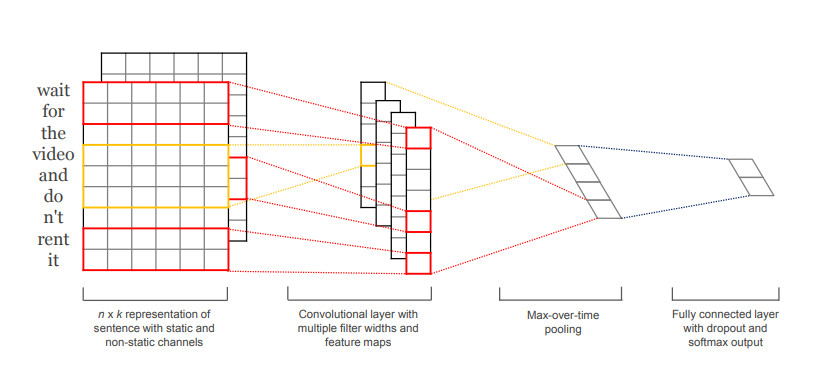

# Plan

* rodzaje klasyfikacji
* miary poprawności klasyfikacji
* klasyfikacja w oparciu o regułę Bayesa
* klasyfikacja w oparciu o osadzenia wyrazów
* **regresja tekstowa**

# Regresja

&nbsp;

<center><img src="img/linear_regression.svg.png" width="500px"/></center>


# Przykłady regresji tekstowej


Według mnie statyw na początku był bardzo fajny miał dużo możliwości, ale po drugim dniu chciałem zrobić dobre ujęcie lecz noga od statywu odłamała się a po tygodniu, w podróży odłamała się kolejna. Pózniej okazało się ,że statyw nie jest taki wytrzymały i w konsekwencji straciłem trzecią nogę od statywu. Niestety statyw był bardzo złej jakości. <img src="img/Star_rating_1_of_5.png" width="100px"/>

Wykonanie przeciętne . Krajalnicy nie używamy co 10 min. w ciągu dnia więc denerwujące jest rozkładanie krajalnicy i nakładanie wózka krajalnicy bo bez wózka nie można ukroić nawet kromki chleba. Płyta regulacji grubości krojenia niestabilna co powoduje że wędlina jest krojona nierówno. Przyssawki tak mocne że zostają przyssane do blatu i trzeba je odrywać i nakładać na krajalnicę. Urządzenie niczym się nie wyróżnia. Nie polecam ale wybór należy do kupującego. <img src="img/Star_rating_3_of_5.png" width="100px"/>


Brak odpowiedniej instrukcji montażu - spasowanie prawie ok - czarna ramka zasłania ok 1 mm ekranu przy idealnym spasowaniu otworów aparatu przedniego. Poza tym patent z czarną ramką jest rewelacyjny - ekran ma zaokrąglane rogi i naklejone szkło zawsze w tym miejscu odstaje i wygląda nieestetycznie -tu tego problemu nie ma bo ramka to zakrywa i wygląda to idealnie.  <img src="img/Star_rating_5_of_5.png" width="100px"/>

https://github.com/allegro/klejbenchmark-allegroreviews

# Miary poprawności regresji

* Współczynnik korelacji Pearson'a $PCC(X,Y) = \frac{COV(X, Y)}{\sigma_X\sigma_Y}$

$$
COV(X,Y) = \frac{1}{n} \sum_{i=1}^{n}\left((X_i - \bar{X})(Y_i - \bar{Y})\right)
$$

* Współczynnik korelacji Spearmana $SRCC = PCC(rank(X), rank(Y))$

## Inne zadania w zakresie regresji

* wyszukiwanie
* porównywanie zdań

# Literatura

* https://web.stanford.edu/class/cs124/lec/naivebayes.pdf
* https://en.wikipedia.org/wiki/Evaluation_measures_(information_retrieval)#Mean_average_precision
* [Rozdział nr 4 z SLP](https://web.stanford.edu/~jurafsky/slp3/4.pdf)

<center>
<img src="img/krzeselko-drabinka.jpg" />
</center>

https://www.meblesosnowe.eu/Krzeselko-drabinka-4026